## Part 1

In [1]:
# Asegurar la instalación de paquetes necesarios
using Pkg
packages = [
    "CSV", 
    "Distributions", 
    "DataFrames", 
    "Dates", 
    "Plots", 
    "Random", 
    "LinearAlgebra", 
    "LaTeXStrings", 
    "Lasso", 
    "GLMNet", 
    "HDMjl", 
    "StatsModels", 
    "DecisionTree", 
    "Statistics", 
    "GraphPlot",
    "MLJScikitLearnInterface",
    "MLJ",
    "MLJModels"
]

for pkg in packages
    Pkg.add(pkg)
end

# Cargar los paquetes necesarios
using CSV
using Distributions
using DataFrames
using Dates
using Plots
using Random
using LinearAlgebra
using LaTeXStrings
using Lasso
using GLMNet
using HDMjl
using StatsModels
using DecisionTree
using MLJ
using MLJModels
using MLJScikitLearnInterface
using Statistics

   Resolving package versions...
  No Changes to `C:\Users\Charles\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Charles\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Charles\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Charles\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Charles\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Charles\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Charles\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Charles\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Charles\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Charles\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Charles\.julia\environments\v1.

## Pregunta 1

1.1

In [2]:
data = CSV.read(
    download("https://raw.githubusercontent.com/d2cml-ai/CausalAI-Course/main/Labs/Assignment/Assignment_5/data/experimental/experimental_control.csv"),
    DataFrame
)

Row,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,37,11,1,0,1,1,0.0,0.0,9930.05
2,1,22,9,0,1,0,1,0.0,0.0,3595.89
3,1,30,12,1,0,0,0,0.0,0.0,24909.4
4,1,27,11,1,0,0,1,0.0,0.0,7506.15
5,1,33,8,1,0,0,1,0.0,0.0,289.79
6,1,22,9,1,0,0,1,0.0,0.0,4056.49
7,1,23,12,1,0,0,0,0.0,0.0,0.0
8,1,32,11,1,0,0,1,0.0,0.0,8472.16
9,1,22,16,1,0,0,0,0.0,0.0,2164.02


1.2

In [3]:
treated = data[data.treat .== 1, :]  # Filtramos las filas donde treat == 1 el cual es el grupo de tratamiento. 
control = data[data.treat .== 0, :]  # Filtramos las filas donde treat == 0, este representa el grupo de control.

# Calculamos el promedio de nuestra variable de interés, el igreso en 1978.
mean_treated = mean(treated.re78)  # Promedio de ingresos en el grupo tratado
mean_control = mean(control.re78)  # Promedio de ingresos en el grupo control

# Se calcula el ATE (Diferencia de medias).
ATE = mean_treated - mean_control  # Efecto Promedio del Tratamiento

# Resultados:
println("Promedio grupo tratado (re78): ", mean_treated)
println("Promedio grupo control (re78): ", mean_control)
println("Efecto Promedio del Tratamiento (ATE): ", ATE)

Promedio grupo tratado (re78): 6349.143502065298
Promedio grupo control (re78): 4554.801120215196
Efecto Promedio del Tratamiento (ATE): 1794.3423818501024


El ATE positivo de 1794.34 implica que, en promedio, los ingresos del grupo tratado (quienes participaron en el programa de soporte de trabajo) fueron $1794.34 mayores que los del grupo de control (quienes no participaron). Esto sugiere que el programa tuvo un impacto positivo en los ingresos de los participantes en 1978 (re78), lo que podría significar que el programa fue efectivo en mejorar las habilidades laborales, aumentar el acceso a oportunidades de trabajo, o proporcionar mejores empleos. 

Si consideramos que el grupo de control es representativo de lo que les habría ocurrido a los tratados sin el programa, entonces esta diferencia se puede atribuir causalmente al programa (asumiendo un diseño experimental adecuado).

1.3

In [4]:
using MLJ
using MLJModels

# Coerción de variables categóricas a Multiclass
coerce!(data, :black => Multiclass,
            :hisp => Multiclass,
            :marr => Multiclass,
            :nodegree => Multiclass,
            :treat => Multiclass)

# Separar características (X) y la variable objetivo (D)
D, X = unpack(data, ==(:treat), !=(:treat))

# Codificación One-Hot
OneHotEncoderModel = @load OneHotEncoder pkg=MLJModels verbosity=0
ohe = OneHotEncoderModel()
ohe_machine = machine(ohe, X)
MLJ.fit!(ohe_machine)
X_encoded = MLJ.transform(ohe_machine, X)

# Limpieza y corrección de columnas problemáticas
for name in names(X_encoded)
    # Verificar si la columna contiene `Count` y convertirla a `Float64`
    if scitype(X_encoded[!, name]) == Count
        X_encoded[!, name] = float.(X_encoded[!, name])
    end
    # Extraer probabilidades explícitas si la columna contiene `UnivariateFinite`
    if eltype(X_encoded[!, name]) <: UnivariateFinite
        X_encoded[!, name] = [pdf(val, 1) for val in X_encoded[!, name]]
    end
end

# Verificar tipos científicos de las columnas después de la limpieza
println("Tipos corregidos en X_encoded:")
for col in eachcol(X_encoded)
    println("Columna: ", eltype(col), " | Scitype: ", scitype(col))
end

# Asegurar que los valores faltantes sean reemplazados
X_cleaned = coalesce.(X_encoded, 0.0)  # Reemplazar valores `missing` por 0.0

# Modelo de clasificación logística
LogisticClassifierModel = @load LogisticClassifier pkg=MLJScikitLearnInterface verbosity=0
log_model = LogisticClassifierModel(solver="liblinear")  # Usar un solver robusto para datasets pequeños

# Entrenar el modelo
log_machine = machine(log_model, X_cleaned, D, scitype_check_level=0)
MLJ.fit!(log_machine)

# Predecir puntajes de propensión como distribuciones de probabilidad
predictions = MLJ.predict(log_machine, X_cleaned)

# Extraer probabilidades de la clase positiva (treat = 1)
propensity_scores = [pdf(p, 1) for p in predictions]

# Agregar los puntajes de propensión al DataFrame original
data[!, :propensity_score] = propensity_scores

# Confirmar que los puntajes de propensión se agregaron correctamente
println("Propensity scores agregados al DataFrame:")
println(data[!, :propensity_score])

[ Info: Training machine(OneHotEncoder(features = Symbol[], …), …).
[ Info: Spawning 2 sub-features to one-hot encode feature :black.
[ Info: Spawning 2 sub-features to one-hot encode feature :hisp.
[ Info: Spawning 2 sub-features to one-hot encode feature :marr.


Tipos corregidos en X_encoded:
Columna: 

[ Info: Spawning 2 sub-features to one-hot encode feature :nodegree.


Int64 | Scitype: AbstractVector{Count}
Columna: Int64 | Scitype: AbstractVector{Count}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}
Columna: Float64 | Scitype: AbstractVector{ScientificTypesBase.Continuous}


[ Info: Training machine(LogisticClassifier(penalty = l2, …), …).
C:\Users\Charles\.julia\environments\v1.10\.CondaPkg\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Propensity scores agregados al DataFrame:
[0.45340519080333075, 0.2421133677059106, 0.7377854692715371, 0.39010209423191256, 0.36833050507051995, 0.3772010948559998, 0.4953971659589892, 0.4059740268313216, 0.45973283402767556, 0.6375515369008038, 0.4134429340133237, 0.6481994301536207, 0.3470969049919884, 0.5436049911626747, 0.3875809178209107, 0.3525664579370734, 0.6320374420706343, 0.4002813135291437, 0.625588114854007, 0.6072485523550406, 0.31554443184024855, 0.5227755522703175, 0.40042243083099166, 0.33452660170438836, 0.42806610013021007, 0.4398865189635233, 0.41091515974576825, 0.29669088354322104, 0.47774190813383194, 0.3255534764727376, 0.32079584908689285, 0.5055743792902547, 0.3561789322312922, 0.49136651381359514, 0.5305693405480215, 0.6913831705717569, 0.45689278859148286, 0.581747181608702, 0.4383671987409019, 0.32904874376164145, 0.5054929983123899, 0.44287679857848805, 0.42345049994580797, 0.26275748016164385, 0.34784294456767206, 0.34160295972574295, 0.3458797829238068,

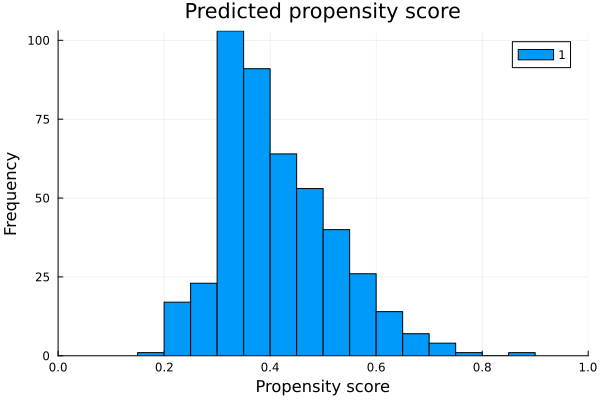

In [5]:
using Plots

histogram(propensity_scores, bins=30, title="Predicted propensity score", label = "1",
         xlabel="Propensity score", ylabel="Frequency",xlims=(0, 1))

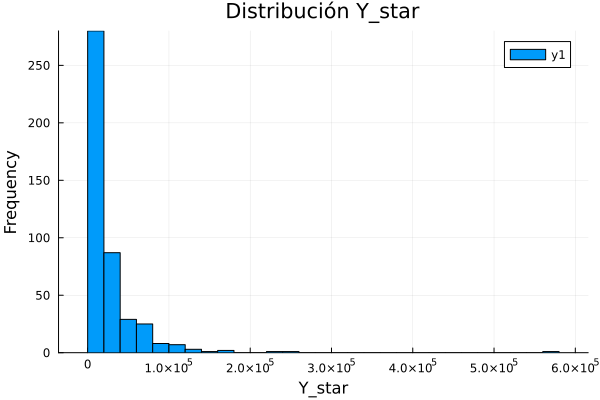

In [6]:
y, X = unpack(data, ==(:re78), !=(:re78))
Y = y
D_continuo = coerce(D, MLJ.Continuous)
# Compute Y_star
Y_star = (Y .* D_continuo) ./ propensity_scores .- (Y .* (1 .- D_continuo)) ./ (1 .- propensity_scores)

# Add Y_star to the DataFrame
data.Y_star = Y_star
histogram(Y_star, bins=50, title="Distribución Y_star", xlabel="Y_star", ylabel="Frequency")

In [8]:
Pkg.add("MLJDecisionTreeInterface")

   Resolving package versions...
   Installed MLJDecisionTreeInterface ─ v0.4.2
    Updating `C:\Users\Charles\.julia\environments\v1.10\Project.toml`
  [c6f25543] + MLJDecisionTreeInterface v0.4.2
    Updating `C:\Users\Charles\.julia\environments\v1.10\Manifest.toml`
  [c6f25543] + MLJDecisionTreeInterface v0.4.2
Precompiling project...
  ✓ MLJDecisionTreeInterface
  1 dependency successfully precompiled in 6 seconds. 360 already precompiled.


In [9]:
tree_regressor = @load DecisionTreeRegressor pkg=DecisionTree verbosity=0
tree_model = tree_regressor(max_depth=3)
tree_machine = machine(tree_model, X_encoded, Y_star)
MLJ.fit!(tree_machine)
fitted_params(tree_machine)[1]

[ Info: Training machine(DecisionTreeRegressor(max_depth = 3, …), …).


re78 < 21550.0
├─ re78 < 6104.0
│  ├─ re78 < 2257.0
│  │  ├─ 1747.0287601914154 (0/196)
│  │  └─ 17803.79423049841 (0/93)
│  └─ re78 < 17050.0
│     ├─ 40978.61530544708 (0/135)
│     └─ 86151.75586591024 (0/12)
└─ 206738.03515242873 (0/9)


In [10]:
forest_regressor = @load RandomForestRegressor pkg=DecisionTree verbosity=0
forest_model = forest_regressor(n_trees=100, max_depth=10)

forest_machine = machine(forest_model, X_encoded, Y_star)
MLJ.fit!(forest_machine)

# feature importance
importance = feature_importances(forest_machine)

println("Importancia de las características:")
for (var, imp) in zip(names(X_encoded), importance)
    println("$var: $imp")
end

Importancia de las características:

[ Info: Training machine(RandomForestRegressor(max_depth = 10, …), …).



age: :re78 => 0.6786623230879156
educ: :re75 => 0.08189973256869719
black__0: :age => 0.06702712291526716
black__1: :educ => 0.05636824177564757
hisp__0: :re74 => 0.0521117201911356
hisp__1: :marr__0 => 0.011623972130991428
marr__0: :nodegree__1 => 0.010914959812729028
marr__1: :black__0 => 0.009968501080743028
nodegree__0: :marr__1 => 0.009678072790035267
nodegree__1: :black__1 => 0.008473090123003674
re74: :nodegree__0 => 0.007243750820770566
re75: :hisp__1 => 0.0035295854483385325
re78: :hisp__0 => 0.0024989272547255824


1.5

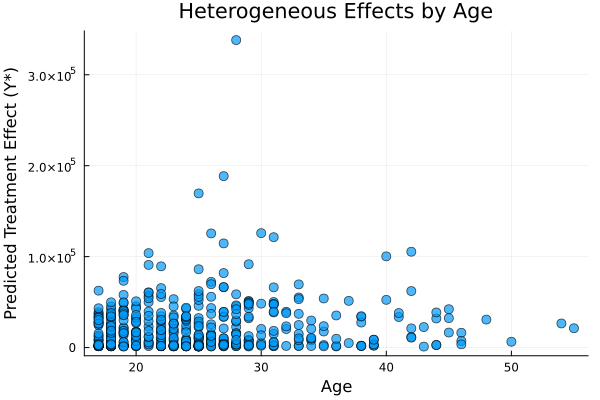

In [11]:
using Plots

# Variable seleccionada: age
selected_variable = :age

# Extraer valores de la variable seleccionada
age_values = X_encoded[!, selected_variable]

# Generar predicciones usando el modelo ajustado
predicted_effects = MLJ.predict(forest_machine, X_encoded)

# Crear el gráfico
scatter(age_values, predicted_effects, 
        xlabel="Age", 
        ylabel="Predicted Treatment Effect (Y*)", 
        title="Heterogeneous Effects by Age",
        legend=false, 
        alpha=0.7, 
        markersize=5)

## Part 2


In [40]:
using Pkg

In [41]:
using CSV, DataFrames, StatsModels, GLM, Random, MLBase, MLJ, PrettyTables, FixedEffectModels

1. 

In [42]:
data= CSV.read(
    download("https://github.com/d2cml-ai/CausalAI-Course/raw/refs/heads/main/Labs/Assignment/Assignment_5/data/observational/biased_control.csv"),
    DataFrame);

In [43]:
data

Row,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78,agesq,agecube,educsq,u74,u75,interaction1,re74sq,re75sq
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,0,45,11,0,0,1,1,21.5167,25.2436,25.5647,2025,91125,121,0,0,236.683,462.967,637.237
2,0,21,14,0,0,0,0,3.17597,5.85256,13.4961,441,9261,196,0,0,44.4636,10.0868,34.2525
3,0,38,12,0,0,1,0,23.039,25.1308,25.5647,1444,54872,144,0,0,276.468,530.796,631.555
4,0,48,6,0,0,1,1,24.9944,25.2436,25.5647,2304,110592,36,0,0,149.966,624.718,637.237
5,0,18,8,0,0,1,1,1.6693,10.7276,9.86087,324,5832,64,0,0,13.3544,2.78655,115.082
6,0,22,11,0,0,1,1,16.3658,18.4493,25.5647,484,10648,121,0,0,180.023,267.838,340.376
7,0,48,10,0,0,1,1,16.8046,16.3546,18.0593,2304,110592,100,0,0,168.046,282.396,267.473
8,0,18,11,0,0,0,1,1.14421,3.62003,15.7393,324,5832,121,0,0,12.5863,1.30922,13.1046
9,0,48,9,0,0,1,1,25.8623,25.2436,25.5647,2304,110592,81,0,0,232.761,668.86,637.237


2. 

Spliting 

In [44]:
treatment= filter(row -> row.treat == 1, data)

Row,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78,agesq,agecube,educsq,u74,u75,interaction1,re74sq,re75sq
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,37,11,1,0,1,1,0.0,0.0,9.93005,1369,50653,121,1,1,0.0,0.0,0.0
2,1,22,9,0,1,0,1,0.0,0.0,3.59589,484,10648,81,1,1,0.0,0.0,0.0
3,1,30,12,1,0,0,0,0.0,0.0,24.9094,900,27000,144,1,1,0.0,0.0,0.0
4,1,27,11,1,0,0,1,0.0,0.0,7.50615,729,19683,121,1,1,0.0,0.0,0.0
5,1,33,8,1,0,0,1,0.0,0.0,0.28979,1089,35937,64,1,1,0.0,0.0,0.0
6,1,22,9,1,0,0,1,0.0,0.0,4.05649,484,10648,81,1,1,0.0,0.0,0.0
7,1,23,12,1,0,0,0,0.0,0.0,0.0,529,12167,144,1,1,0.0,0.0,0.0
8,1,32,11,1,0,0,1,0.0,0.0,8.47216,1024,32768,121,1,1,0.0,0.0,0.0
9,1,22,16,1,0,0,0,0.0,0.0,2.16402,484,10648,256,1,1,0.0,0.0,0.0


In [45]:
control = filter(row -> row.treat == 0, data)

Row,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78,agesq,agecube,educsq,u74,u75,interaction1,re74sq,re75sq
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,0,45,11,0,0,1,1,21.5167,25.2436,25.5647,2025,91125,121,0,0,236.683,462.967,637.237
2,0,21,14,0,0,0,0,3.17597,5.85256,13.4961,441,9261,196,0,0,44.4636,10.0868,34.2525
3,0,38,12,0,0,1,0,23.039,25.1308,25.5647,1444,54872,144,0,0,276.468,530.796,631.555
4,0,48,6,0,0,1,1,24.9944,25.2436,25.5647,2304,110592,36,0,0,149.966,624.718,637.237
5,0,18,8,0,0,1,1,1.6693,10.7276,9.86087,324,5832,64,0,0,13.3544,2.78655,115.082
6,0,22,11,0,0,1,1,16.3658,18.4493,25.5647,484,10648,121,0,0,180.023,267.838,340.376
7,0,48,10,0,0,1,1,16.8046,16.3546,18.0593,2304,110592,100,0,0,168.046,282.396,267.473
8,0,18,11,0,0,0,1,1.14421,3.62003,15.7393,324,5832,121,0,0,12.5863,1.30922,13.1046
9,0,48,9,0,0,1,1,25.8623,25.2436,25.5647,2304,110592,81,0,0,232.761,668.86,637.237


Stadistics

In [46]:
variables_compare = [:age, :educ, :black]

3-element Vector{Symbol}:
 :age
 :educ
 :black

In [47]:
describe(treatment[!,variables_compare])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,age,25.8162,17,25.0,48,0,Int64
2,educ,10.3459,4,11.0,16,0,Int64
3,black,0.843243,0,1.0,1,0,Int64


In [48]:
describe(control[!,variables_compare])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,age,33.2252,16,31.0,55,0,Int64
2,educ,12.0275,0,12.0,18,0,Int64
3,black,0.0735368,0,0.0,1,0,Int64


Las personas que han formado parte del programa de capacitación laboral tienen una edad promedio de 25 años (edad objetivo), mientras que el grupo de control tienen una edad aproximada de 33 años. Por otro lado, las personas tratadas tienen 10 años de educación en promedio, mientras que el grupo de control tiene 12 años de educación en promedio. 

3. 

In [49]:
model= lm(@formula(re78 ~ treat), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

re78 ~ 1 + treat

Coefficients:
─────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  14.8467    0.0761429  194.98    <1e-99   14.6974    14.9959
treat        -8.49752   0.712021   -11.93    <1e-31   -9.89316   -7.10188
─────────────────────────────────────────────────────────────────────────

Se puede observar que existe un efecto inverso del tratamiento sobre la población tratada. La aplicación del programa aparantemente ha reducido los ingresos reales de la población de 1978 en un 8.4 por ciento. 

4. 

In [50]:
data

Row,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78,agesq,agecube,educsq,u74,u75,interaction1,re74sq,re75sq
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,0,45,11,0,0,1,1,21.5167,25.2436,25.5647,2025,91125,121,0,0,236.683,462.967,637.237
2,0,21,14,0,0,0,0,3.17597,5.85256,13.4961,441,9261,196,0,0,44.4636,10.0868,34.2525
3,0,38,12,0,0,1,0,23.039,25.1308,25.5647,1444,54872,144,0,0,276.468,530.796,631.555
4,0,48,6,0,0,1,1,24.9944,25.2436,25.5647,2304,110592,36,0,0,149.966,624.718,637.237
5,0,18,8,0,0,1,1,1.6693,10.7276,9.86087,324,5832,64,0,0,13.3544,2.78655,115.082
6,0,22,11,0,0,1,1,16.3658,18.4493,25.5647,484,10648,121,0,0,180.023,267.838,340.376
7,0,48,10,0,0,1,1,16.8046,16.3546,18.0593,2304,110592,100,0,0,168.046,282.396,267.473
8,0,18,11,0,0,0,1,1.14421,3.62003,15.7393,324,5832,121,0,0,12.5863,1.30922,13.1046
9,0,48,9,0,0,1,1,25.8623,25.2436,25.5647,2304,110592,81,0,0,232.761,668.86,637.237


Features setting 

In [51]:
y= data[!,:re78]

16177-element Vector{Float64}:
 25.564669921875
 13.496080078125
 25.564669921875
 25.564669921875
  9.860869140625
 25.564669921875
 18.05930078125
 15.73926953125
 25.564669921875
  3.92484204101563
 25.564669921875
  6.84778515625
 25.564669921875
  ⋮
  0.0
  0.672877319335938
  0.0
 10.092830078125
  6.28143310546875
 12.5907099609375
  5.11201416015625
 15.952599609375
 36.64694921875
 12.8039697265625
  3.7866279296875
  4.18194189453125

In [52]:
d = data[!,:treat];
x = data[!,2:end];

In [57]:
x_new = select(x,Not(:re78));

In [58]:
println("\n length of y is \n", size(y,1) )
println("\n num features x is \n", size(x_new,2 ) )

# Naive OLS
print( "\n Naive OLS that uses all features w/o cross-fitting \n" )
fm = term(:re78) ~ term(:treat) +sum(term.(Symbol.(names(data[:,4:size(data,2)]))));
lres = reg(data, fm);
first(DataFrame(GLM.coeftable(lres)))


 length of y is 
16177

 num features x is 
16

 Naive OLS that uses all features w/o cross-fitting 


Row,Name,Estimate,Std. Error,t-stat,Pr(>|t|),Lower 95%,Upper 95%
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,treat,2.75176e-13,1.83225e-13,1.50184,0.133157,-8.39662e-14,6.34317e-13


In [59]:
function training_sample_append(cv_split, test_sample_index)
    training_indices = []
    for vector in cv_split[Not(test_sample_index)]
            training_indices = [training_indices; vector]
    end
    return training_indices, cv_split[test_sample_index]
end

function dml(x, d, y, dreg, yreg, nfold)
    n = length(y)
    cv = [partition(eachindex(y), fill(1/nfold, nfold-1)..., shuffle = true, rng = 1234)...]
    machine_y = machine(yreg, x, y, scitype_check_level=0)
    machine_d = machine(dreg, x, d, scitype_check_level=0)
    y_hat = zeros(n)
    d_hat = zeros(n)

    for fold in 1:nfold
            training_fold, test_fold = training_sample_append(cv, fold)
            y_hat[test_fold] = MLJ.predict(MLJ.fit!(machine_y, rows = training_fold), x[test_fold, :])
            d_hat[test_fold] = MLJ.predict(MLJ.fit!(machine_d, rows = training_fold), x[test_fold, :])
    end

    resy = y .- y_hat
    resd = reshape(d .- d_hat, (n, 1))
    estimate = lm(resd, resy)
    coef_est = GLM.coef(estimate)[1]
    se = GLM.coeftable(estimate).cols[2][1]
    println(" coef (se) = ", coef_est ,"(",se,")")
    return coef_est, se, resy, resd;
end

function summarize(point, stderr, resy, resd, name)
    return DataFrame(
            model = [name],
            estimate = [point], stderr = [stderr], 
            rmse_y = [sqrt(mean(resy .^ 2))], 
            rmse_d = [sqrt(mean(resd .^ 2))]
    )
end

summarize (generic function with 1 method)

In [60]:
LinearRegressor = @load LinearRegressor pkg=MLJScikitLearnInterface verbosity=0
dreg = Standardizer() |> LinearRegressor()
yreg = Standardizer() |> LinearRegressor()
result_ols = dml(x_new, d, y, dreg, yreg, 10);
table_ols = summarize(result_ols..., "OLS")

LassoCVRegressor = @load LassoCVRegressor pkg=MLJScikitLearnInterface verbosity=0
dreg = Standardizer() |> LassoCVRegressor(max_iter=200000)
yreg = Standardizer() |> LassoCVRegressor(max_iter=200000)
results_lasso = dml(x_new, d, y, dreg, yreg, 10);
table_lasso = summarize(results_lasso..., "LassoCV")

RandomForestRegressor = @load RandomForestRegressor pkg=MLJScikitLearnInterface verbosity=0
dreg = RandomForestRegressor()
yreg = RandomForestRegressor()
results_rf = dml(x_new, d, y, dreg, yreg, 10);
table_rf = summarize(results_rf..., "RF");

dreg = Standardizer() |> LassoCVRegressor(max_iter=200000)
results_mix = dml(x_new, d, y, dreg , yreg, 10)
table_mix = summarize(results_mix..., "RF/LassoCV");

[ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
[ Info: Training machine(:standardizer, …).
[ Info: Training machine(:linear_regressor, …).
[ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
[ Info: Training machine(:standardizer, …).
[ Info: Training machine(:linear_regressor, …).
[ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
[ Info: Training machine(:standardizer, …).
[ Info: Training machine(:linear_regressor, …).
[ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
[ Info: Training machine(:standardizer, …).
[ Info: Training machine(:linear_regressor, …).
[ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
[ Info: Training machine(:standardizer, …).
[ Info: Training machine(:linear_regressor, …).


 coef (se) = 1.5709386603560087(0.5566576621515644)


[ Info: Training machine(:standardizer, …).
[ Info: Training machine(:linear_regressor, …).
[ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
[ Info: Training machine(:standardizer, …).
[ Info: Training machine(:lasso_cv_regressor, …).
[ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
[ Info: Training machine(:standardizer, …).
[ Info: Training machine(:lasso_cv_regressor, …).
[ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
[ Info: Training machine(:standardizer, …).
[ Info: Training machine(:lasso_cv_regressor, …).
[ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
[ Info: Training machine(:standardizer, …).
[ Info: Training machine(:lasso_cv_regressor, …).
[ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), 

 coef (se) = -6.8648614346022345(0.6890101388572876)


[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(

 coef (se) = 1.3222776645039664(0.6412491136976307)


[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
[ Info: Training machine(:standardizer, …).
[ Info: Training machine(:lasso_cv_regressor, …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
[ Info: Training machine(:standardizer, …).
[ Info: Training machine(:lasso_cv_regressor, …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
[ Info: Training machine(:standardizer, …).
[ Info: Training machine(:lasso_cv_regressor, …).
[ Info: Training machine(RandomForestRegressor(n_estimators = 100, …), …).
[ Info: Training machine(DeterministicPipeline(standardizer = Standardizer(features = Symbol[]

 coef (se) = 0.299912492038074(0.5496452306828948)


In [97]:
pretty_table([table_ols; table_lasso; table_rf; table_mix])

┌────────────┬──────────────┬─────────────┬─────────────┬───────────┐
│      model │     estimate │      stderr │      rmse_y │    rmse_d │
│     String │      Float64 │     Float64 │     Float64 │   Float64 │
├────────────┼──────────────┼─────────────┼─────────────┼───────────┤
│        OLS │ -1.31695e-15 │ 1.06766e-15 │ 1.33962e-14 │ 0.0986487 │
│    LassoCV │   2.71274e-5 │ 0.000769726 │  0.00967164 │ 0.0987935 │
│         RF │    0.0890871 │   0.0207179 │    0.228781 │  0.086774 │
│ RF/LassoCV │     0.206418 │   0.0178845 │    0.225644 │ 0.0987935 │
└────────────┴──────────────┴─────────────┴─────────────┴───────────┘


In [ ]:
Aplicando el método de double debiased machine learning podemos encontrar un efecto positivo robusto (en términos de menor desviaciación estándar) por parte del programa de apoyo laboral. 